In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [14]:
filename = '../csv_detection_info/20_2, primaerlesjon.csv'
filename_clean = '../csv_detection_info_clean/20_2, primaerlesjon.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/20/2, primaerlesjon'

In [8]:
detection_df = pd.read_csv(filename)

In [9]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.7230010.3.0.3.5.1.11559663.212476485...,424,548,414,538,0.999857,20,2,"2, primaerlesjon"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1748116982.192.168.1.60....,1129,1290,1544,1704,0.999985,20,2,"2, primaerlesjon"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1748116982.192.168.1.60....,1020,1185,1467,1633,0.999965,20,2,"2, primaerlesjon"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1748116982.192.168.1.60....,990,1157,1674,1840,0.999998,20,2,"2, primaerlesjon"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1748116982.192.168.1.60....,950,1115,1373,1538,0.999999,20,2,"2, primaerlesjon"
...,...,...,...,...,...,...,...,...,...,...
69,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.3825699428.13986.26441.36970.18406....,478,596,412,529,0.968814,20,2,"2, primaerlesjon"
70,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.3985988110.45432.21826.43424.24773....,171,298,346,472,0.703405,20,2,"2, primaerlesjon"
71,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.45484348.14648.23366.40330.59676.38...,707,857,1106,1256,0.999128,20,2,"2, primaerlesjon"
72,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.455129284.26738.39239.33089.12533.1...,1686,1834,732,881,0.999869,20,2,"2, primaerlesjon"


### [Optional] Sort by confidence (filter out bad prediction)

In [10]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [11]:
detection_df[detection_df.confidence < 0.5]

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
13,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.29669.20200826.100220.0.dcm,0,0,0,0,0.0,20,2,"2, primaerlesjon"


Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [12]:
# plot every 9 of them

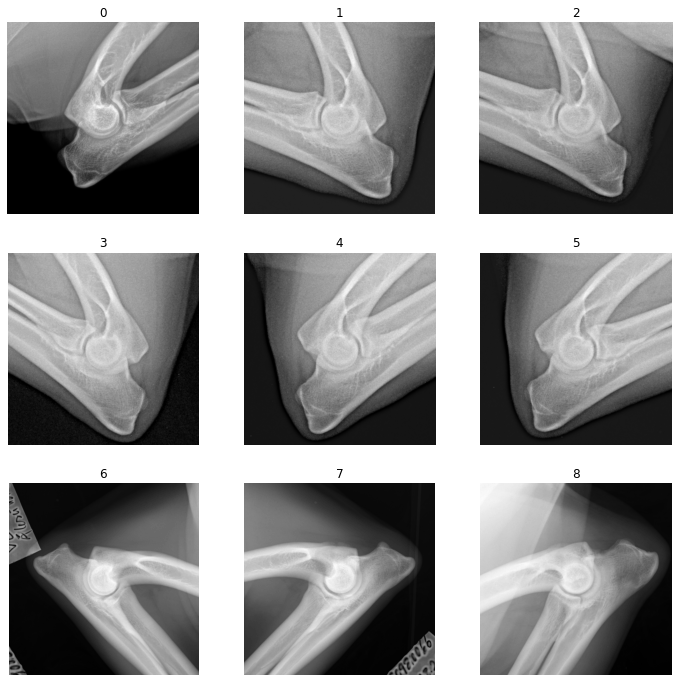

C:\NMBU\Miniconda3\envs\deoxys\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  """
C:\NMBU\Miniconda3\envs\deoxys\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  """


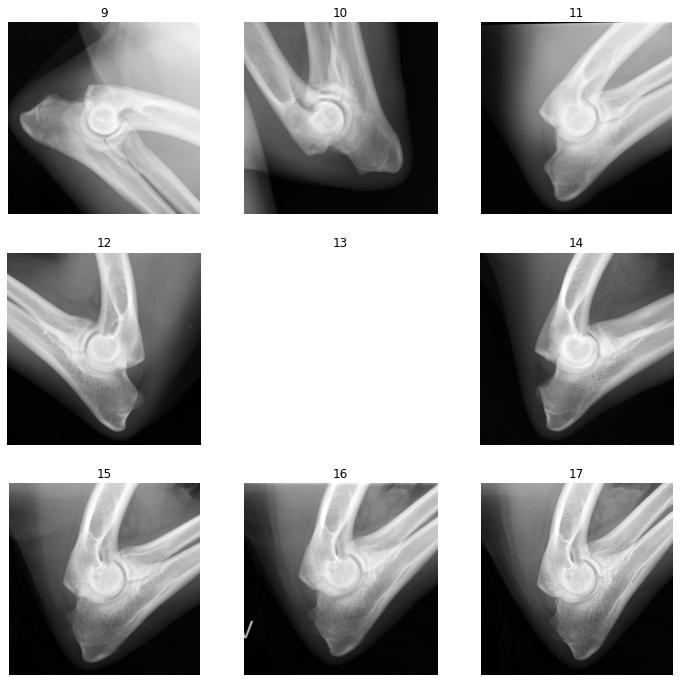

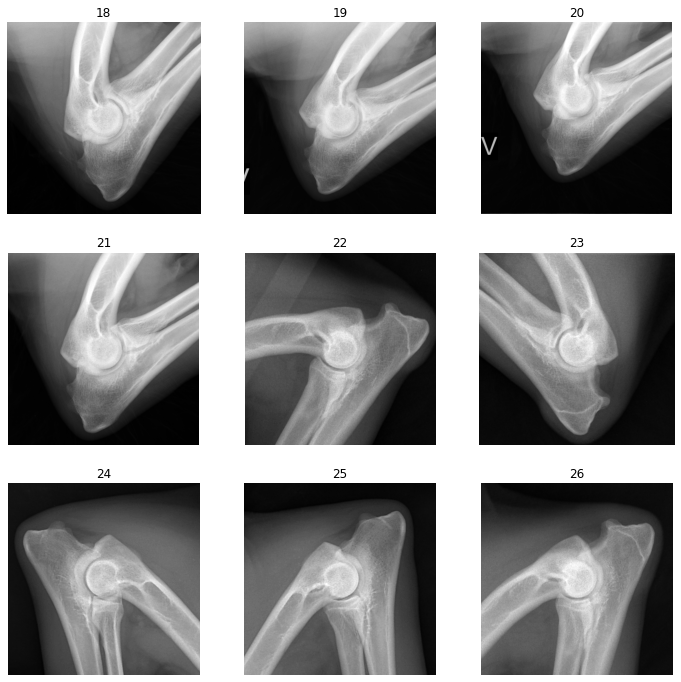

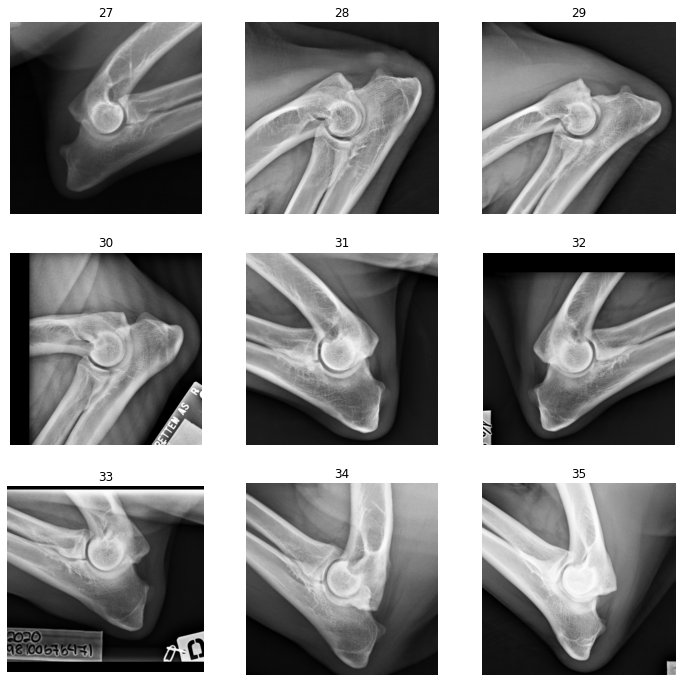

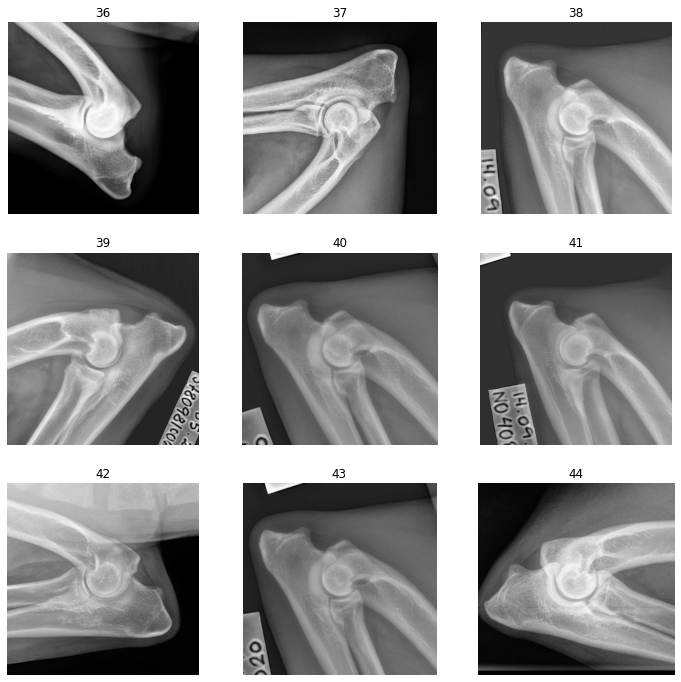

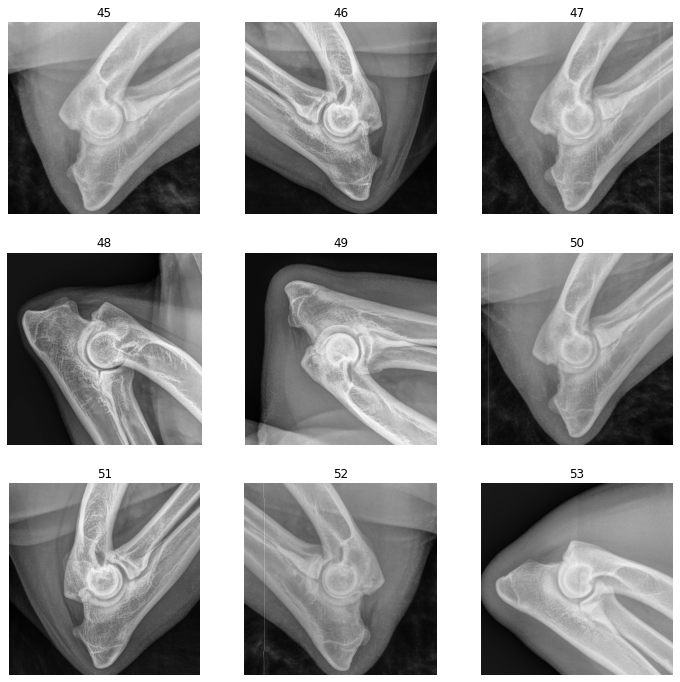

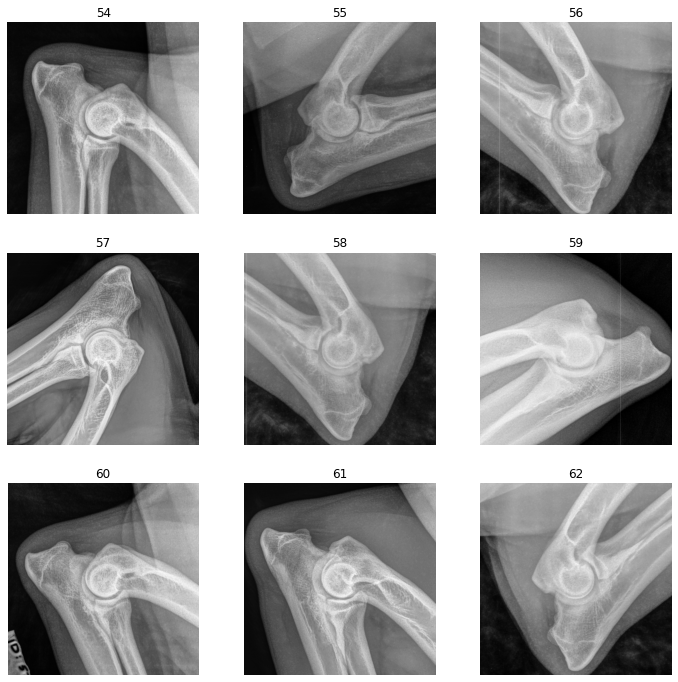

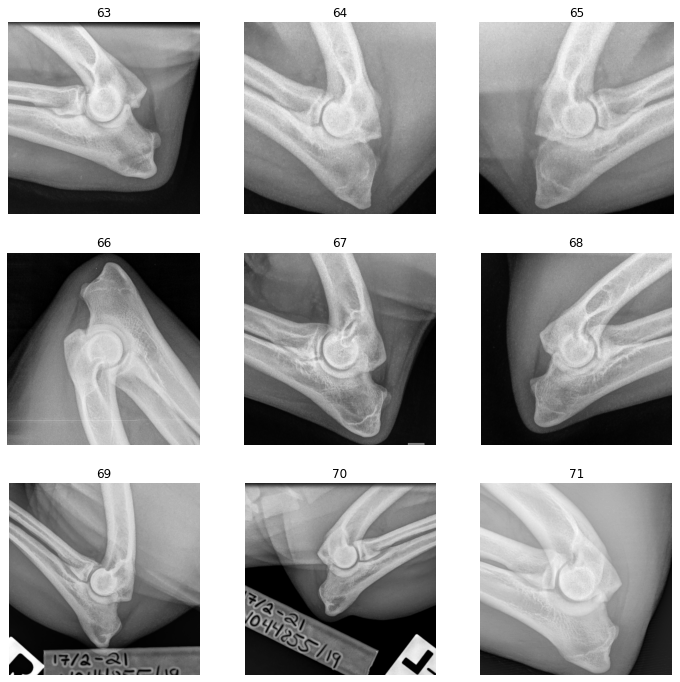

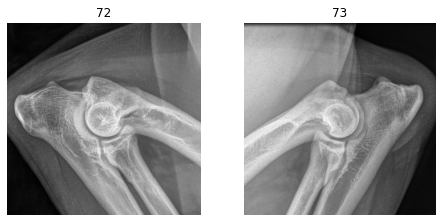

In [15]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [16]:
remove_indice = [13]
detection_df[~detection_df.index.isin(remove_indice)]

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.7230010.3.0.3.5.1.11559663.212476485...,424,548,414,538,0.999857,20,2,"2, primaerlesjon"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1748116982.192.168.1.60....,1129,1290,1544,1704,0.999985,20,2,"2, primaerlesjon"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1748116982.192.168.1.60....,1020,1185,1467,1633,0.999965,20,2,"2, primaerlesjon"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1748116982.192.168.1.60....,990,1157,1674,1840,0.999998,20,2,"2, primaerlesjon"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1748116982.192.168.1.60....,950,1115,1373,1538,0.999999,20,2,"2, primaerlesjon"
...,...,...,...,...,...,...,...,...,...,...
69,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.3825699428.13986.26441.36970.18406....,478,596,412,529,0.968814,20,2,"2, primaerlesjon"
70,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.3985988110.45432.21826.43424.24773....,171,298,346,472,0.703405,20,2,"2, primaerlesjon"
71,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.45484348.14648.23366.40330.59676.38...,707,857,1106,1256,0.999128,20,2,"2, primaerlesjon"
72,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.455129284.26738.39239.33089.12533.1...,1686,1834,732,881,0.999869,20,2,"2, primaerlesjon"


In [17]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [18]:
new_detection_df.to_csv(filename_clean, index=False)